# Import Library and Load Dataset

In [1]:
!pip install category_encoders
!pip install shap
!pip install dalex

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.2-py3-none-any.whl size=1042898 sha256=6de2277838392c299e584faba356b2df33e0ed13130d5c731bbcf96410aa4403
  Stored in directory: /root/.cache/pip/wheels/cd/5e/ec/848120d5b913158656c0f8ef316233dd3356effa64aef19fba
Successfully built dalex


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


|Kolom | Deskripsi |
| - | - |
hotel |	Jenis hotel tempat booking dilakukan: "Resort Hotel" atau "City Hotel"
is_canceled |	Apakah reservasi dibatalkan? 1 = ya, 0 = tidak
lead_time |	Jumlah hari antara pemesanan dan tanggal check-in
arrival_date_year |	Tahun kedatangan tamu
arrival_date_month |	Bulan kedatangan tamu (dalam teks, misal "July")
arrival_date_week_number |	Minggu keberapa dalam tahun saat kedatangan
arrival_date_day_of_month |	Hari di bulan saat kedatangan (1-31)
stays_in_weekend_nights |	Jumlah malam menginap saat akhir pekan (Sabtu/Minggu)
stays_in_week_nights |	Jumlah malam menginap di hari kerja (Senin - Jumat)
adults |	Jumlah tamu dewasa
children |	Jumlah tamu anak-anak
babies |	Jumlah bayi yang ikut menginap
meal |	Paket makan yang dipesan (misalnya: BB = Bed & Breakfast)
country |	Negara asal tamu (kode ISO 3 huruf)
market_segment |	Sumber atau jenis pelanggan: "Online TA", "Direct", "Corporate", dll
distribution_channel |	Saluran pemesanan: "TA/TO" (Travel Agent / Tour Operator), "Direct", dll
is_repeated_guest |	Apakah tamu pernah menginap sebelumnya? 1 = ya, 0 = tidak
previous_cancellations |	Jumlah pemesanan sebelumnya yang dibatalkan oleh tamu
previous_bookings_not_canceled |	Jumlah pemesanan sebelumnya yang tidak dibatalkan
reserved_room_type |	Tipe kamar yang diminta saat booking (kode: A-H)
assigned_room_type |	Tipe kamar yang akhirnya diberikan
booking_changes |	Jumlah perubahan yang dilakukan pada reservasi
deposit_type |	Jenis deposit: "No Deposit", "Non Refund", "Refundable"
agent |	ID agen yang memproses reservasi (jika ada)
company |	ID perusahaan yang memesan kamar (jika ada)
days_in_waiting_list |	Jumlah hari reservasi berada dalam waiting list
customer_type |	Tipe pelanggan: "Transient", "Contract", "Group", dll
adr |	Average Daily Rate: harga yang dibayar per malam per kamar
required_car_parking_spaces |	Jumlah tempat parkir yang diminta oleh tamu
total_of_special_requests |	Jumlah permintaan khusus (seperti extra bed, lantai tinggi, dll)
reservation_status |	Status akhir reservasi: "Canceled", "Check-Out", "No-Show"
reservation_status_date |	Tanggal ketika status reservasi ditentukan (misal tanggal dibatalkan/dikonfirmasi)

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Dibimbing DS31/Assignment/Final Project DS Pricing Optimization/hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [7]:
data.shape

(119390, 32)

## Data Pre-processing

In [8]:
data_cleaned = data.copy()

In [9]:
# check missing value
missing_value = data_cleaned.isnull().sum().sort_values(ascending=False)
missing_value = missing_value.reset_index()
missing_value.columns = ['Feature', 'Missing Value']
missing_value['pencentage'] = round(missing_value['Missing Value'] / data_cleaned.shape[0] * 100, 2)
missing_value

,Feature,Missing Value,pencentage
0,company,112593,94.31
1,agent,16340,13.69
2,country,488,0.41
3,children,4,0.00
4,arrival_date_month,0,0.00
5,arrival_date_week_number,0,0.00
6,hotel,0,0.00
7,is_canceled,0,0.00
8,stays_in_weekend_nights,0,0.00
9,arrival_date_day_of_month,0,0.00


In [10]:
# missing value handling
data_cleaned['children'].fillna(0, inplace=True)
data_cleaned['agent'].fillna(0, inplace=True)

data_cleaned.dropna(subset=['country'], inplace=True)

In [11]:
data_cleaned[(data_cleaned['adults'] == 0) &
             (data_cleaned['children'] == 0) &
             (data_cleaned['babies'] == 0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,NaN,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,NaN,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,NaN,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,NaN,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,NaN,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [12]:
# drop adr negative and adr > 1000
data_cleaned = data_cleaned[data_cleaned['adr'] >= 0]
data_cleaned = data_cleaned[data_cleaned['adr'] <= 1000]

# drop row with 0 adult, 0 children, and 0 babies
data_cleaned = data_cleaned[~((data_cleaned['adults'] == 0) & (data_cleaned['children'] == 0) & (data_cleaned['babies'] == 0))]

In [13]:
# remove useless column
data_cleaned.drop(columns=['reservation_status', 'reservation_status_date', 'company'], inplace=True)

In [14]:
data_cleaned[(data_cleaned['adults'] == 0) &
             (data_cleaned['children'] == 0) &
             (data_cleaned['babies'] == 0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests


In [15]:
# make arrival date column
data_cleaned['arrival_date'] = pd.to_datetime(
    data_cleaned['arrival_date_year'].astype(str) + '-' +
    data_cleaned['arrival_date_month'] + '-' +
    data_cleaned['arrival_date_day_of_month'].astype(str), format='%Y-%B-%d'
    )
data_cleaned.drop(columns=['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date_week_number'], inplace=True)

In [16]:
# extract new feature
data_cleaned['arrival_day_of_week'] = data_cleaned['arrival_date'].dt.day_name()
data_cleaned['arrival_month'] = data_cleaned['arrival_date'].dt.month
data_cleaned['arrival_week'] = data_cleaned['arrival_date'].dt.isocalendar().week

In [17]:
# check duplicated
data_cleaned.duplicated().sum()

np.int64(32214)

In [18]:
# drop duplicated data
data_cleaned.drop_duplicates(inplace=True)

In [19]:
# check unique value in categorical
categorical_cols = data_cleaned.select_dtypes(include='object').columns

for col in categorical_cols:
  print(f"Value counts for column: {col}")
  print(data_cleaned[col].value_counts())
  print("-"*58)

Value counts for column: hotel
hotel
City Hotel      53093
Resort Hotel    33423
Name: count, dtype: int64
----------------------------------------------------------
Value counts for column: meal
meal
BB           67293
SC            9374
HB            9015
Undefined      480
FB             354
Name: count, dtype: int64
----------------------------------------------------------
Value counts for column: country
country
PRT    27188
GBR    10403
FRA     8816
ESP     7234
DEU     5380
       ...  
MRT        1
KIR        1
SDN        1
ATF        1
SLE        1
Name: count, Length: 177, dtype: int64
----------------------------------------------------------
Value counts for column: market_segment
market_segment
Online TA        51360
Offline TA/TO    13780
Direct           11615
Groups            4838
Corporate         4005
Complementary      690
Aviation           226
Undefined            2
Name: count, dtype: int64
----------------------------------------------------------
Value counts 

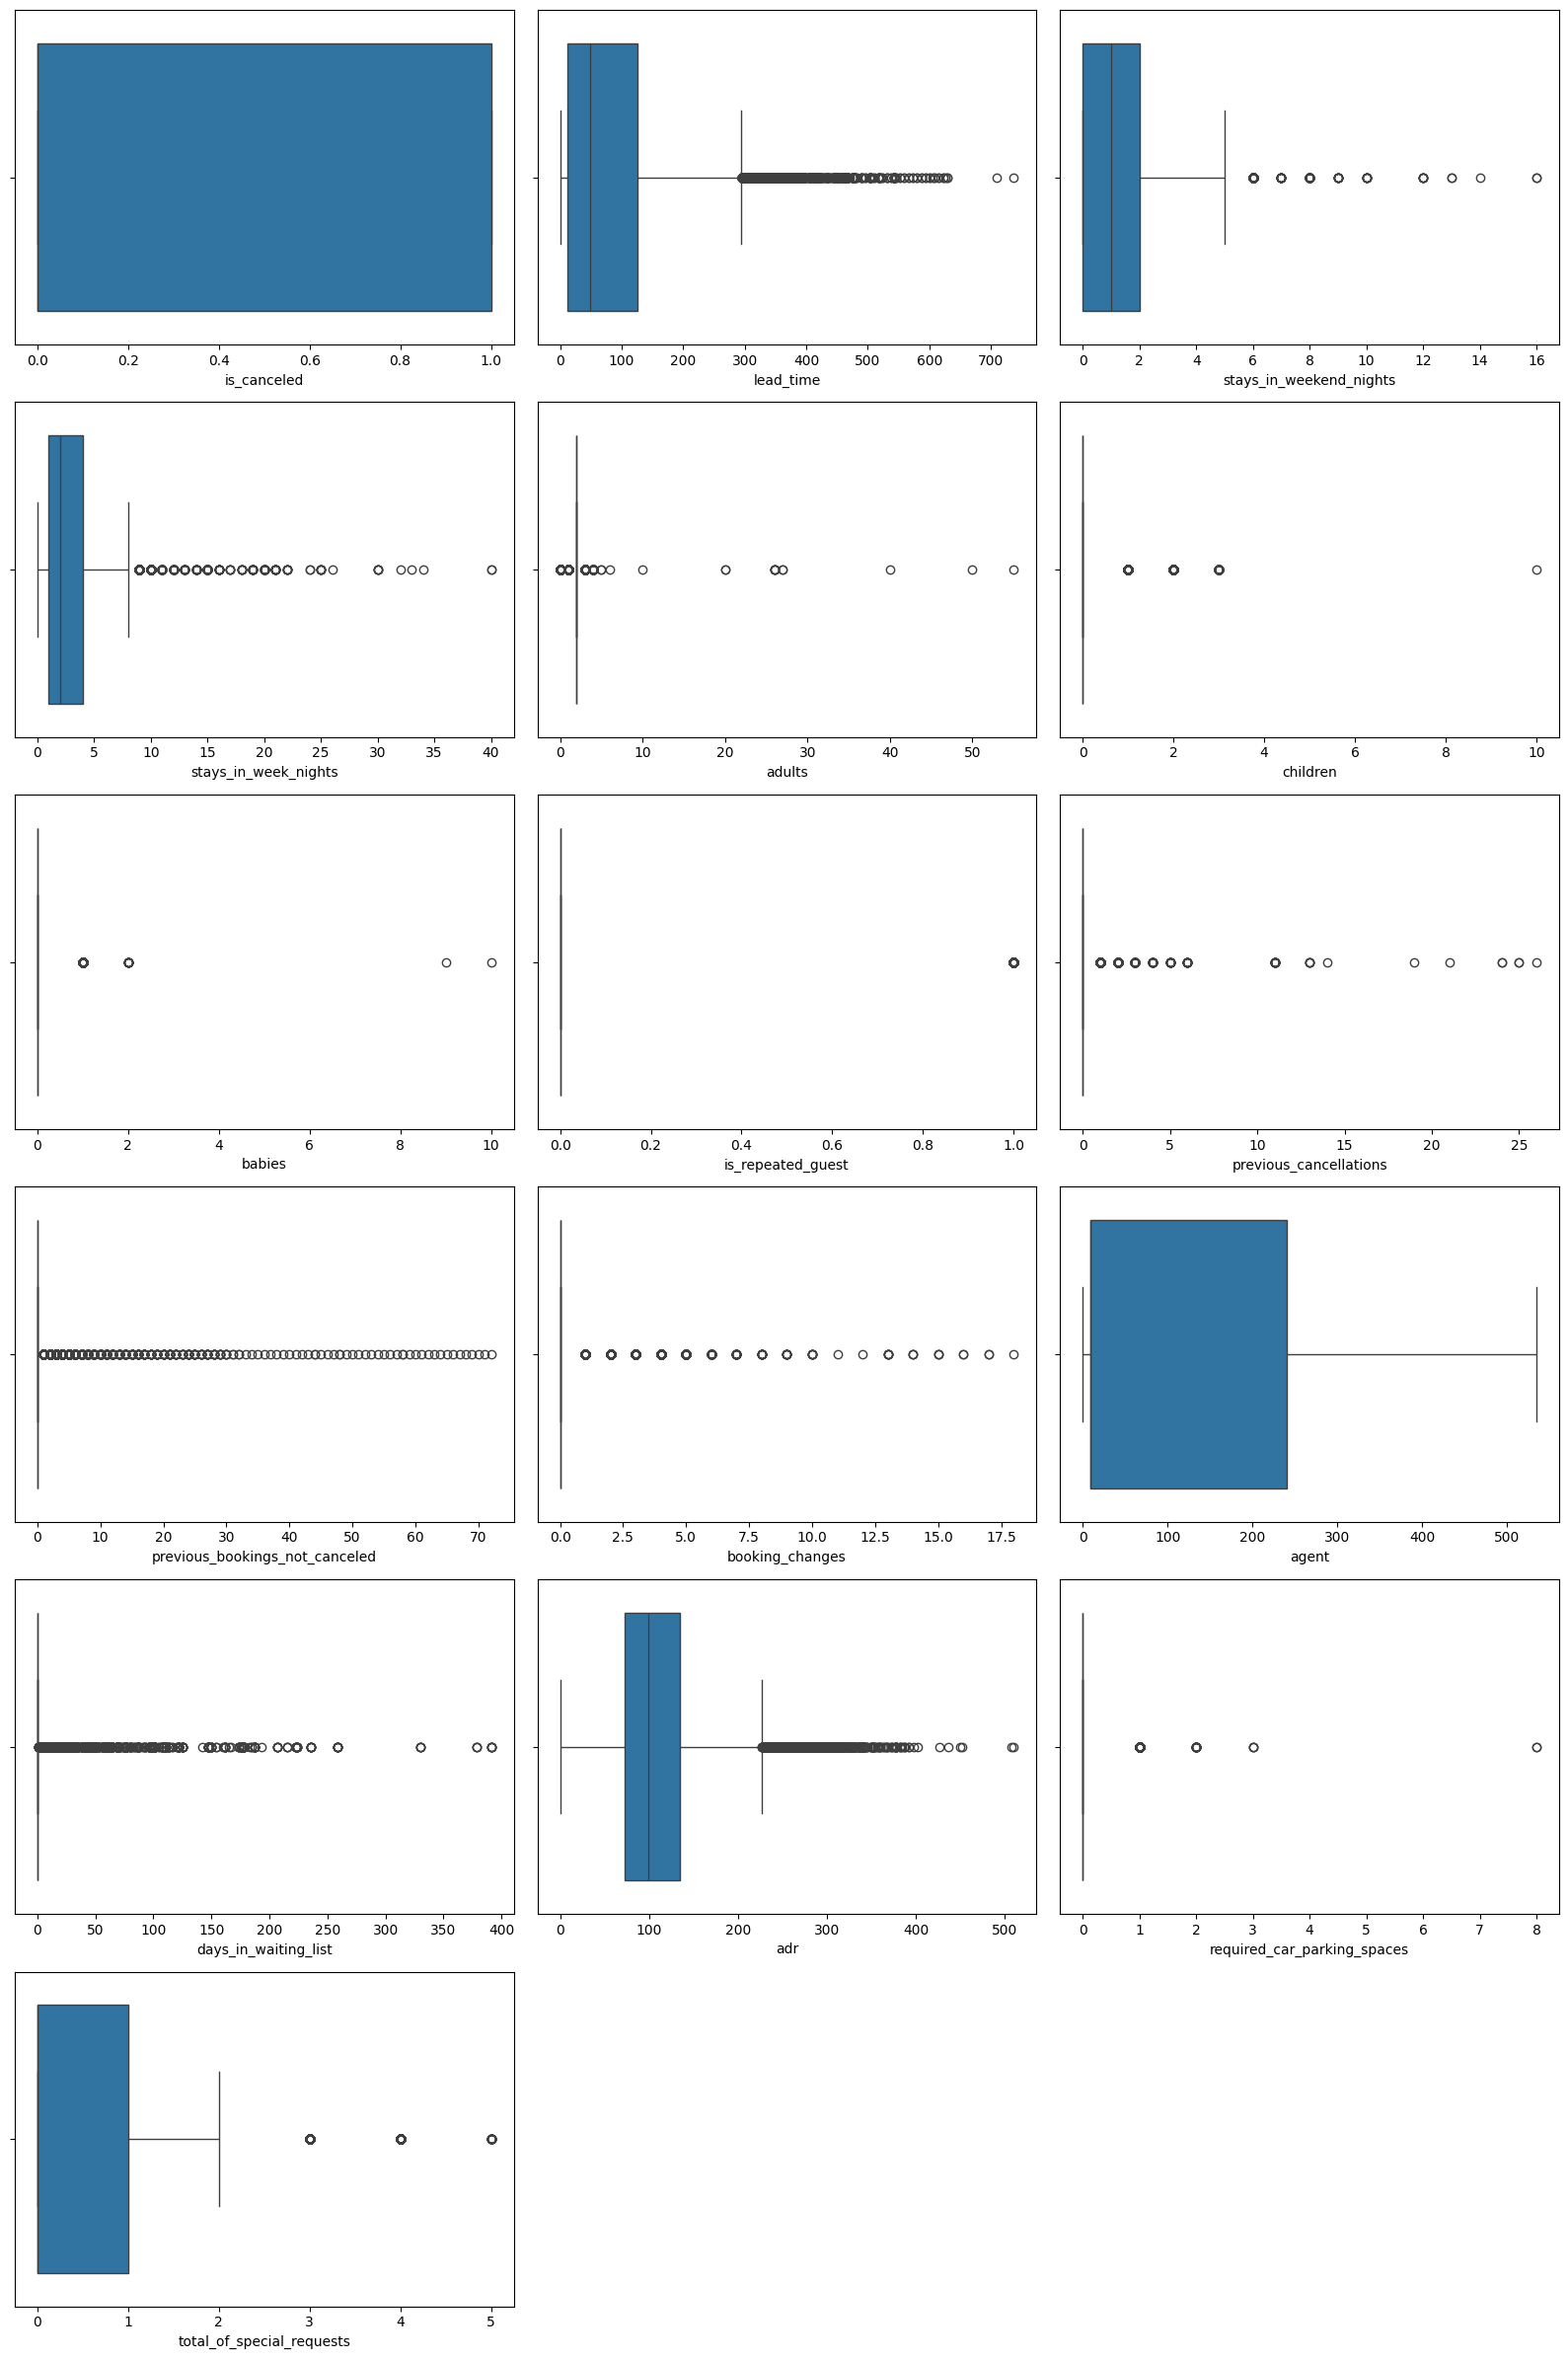

In [20]:
numerical_cols = data_cleaned.select_dtypes(include=['int64', 'float64']).columns

# look distribution plot
pos = 1
fig = plt.figure(figsize=(16, 24))
for i in numerical_cols:
  ax = fig.add_subplot(6, 3, pos)
  pos += 1
  sns.boxplot(data=data_cleaned, x=i, ax=ax)
plt.tight_layout()
plt.show()

In [21]:
# check the number of rows with adr = 0
data_cleaned[data_cleaned['adr'] == 0].shape

(1632, 29)

In [22]:
# drop adr=0 data that is not complimentary or group/contract
data_cleaned = data_cleaned[~(
    (data_cleaned['adr'] == 0) &
    ~(data_cleaned['market_segment'] == 'Complementary') &
    ~(data_cleaned['customer_type'].isin(['Group', 'Contract']))
)]

In [23]:
# look market_segment and reservation_status for adr = 0
data_cleaned[data_cleaned['adr'] == 0][['market_segment', 'customer_type']].value_counts()

market_segment  customer_type  
Complementary   Transient          604
                Transient-Party     20
Direct          Group               12
Offline TA/TO   Contract            12
Online TA       Contract             8
Offline TA/TO   Group                8
Complementary   Group                4
Groups          Group                3
Online TA       Group                3
Name: count, dtype: int64

In [24]:
data_cleaned.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date,arrival_day_of_week,arrival_month,arrival_week
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0,2015-07-01,Wednesday,7,27
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,2015-07-01,Wednesday,7,27
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,2015-07-01,Wednesday,7,27
6,Resort Hotel,0,0,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0.0,0,Transient,107.0,0,0,2015-07-01,Wednesday,7,27
7,Resort Hotel,0,9,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.0,0,1,2015-07-01,Wednesday,7,27


In [25]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85558 entries, 2 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           85558 non-null  object        
 1   is_canceled                     85558 non-null  int64         
 2   lead_time                       85558 non-null  int64         
 3   stays_in_weekend_nights         85558 non-null  int64         
 4   stays_in_week_nights            85558 non-null  int64         
 5   adults                          85558 non-null  int64         
 6   children                        85558 non-null  float64       
 7   babies                          85558 non-null  int64         
 8   meal                            85558 non-null  object        
 9   country                         85558 non-null  object        
 10  market_segment                  85558 non-null  object        
 11  distri

In [26]:
# data cleaned to csv
data_cleaned.to_csv('hotel_booking_demand_cleaned.csv', index=False)

# Exploratory Data Analisis

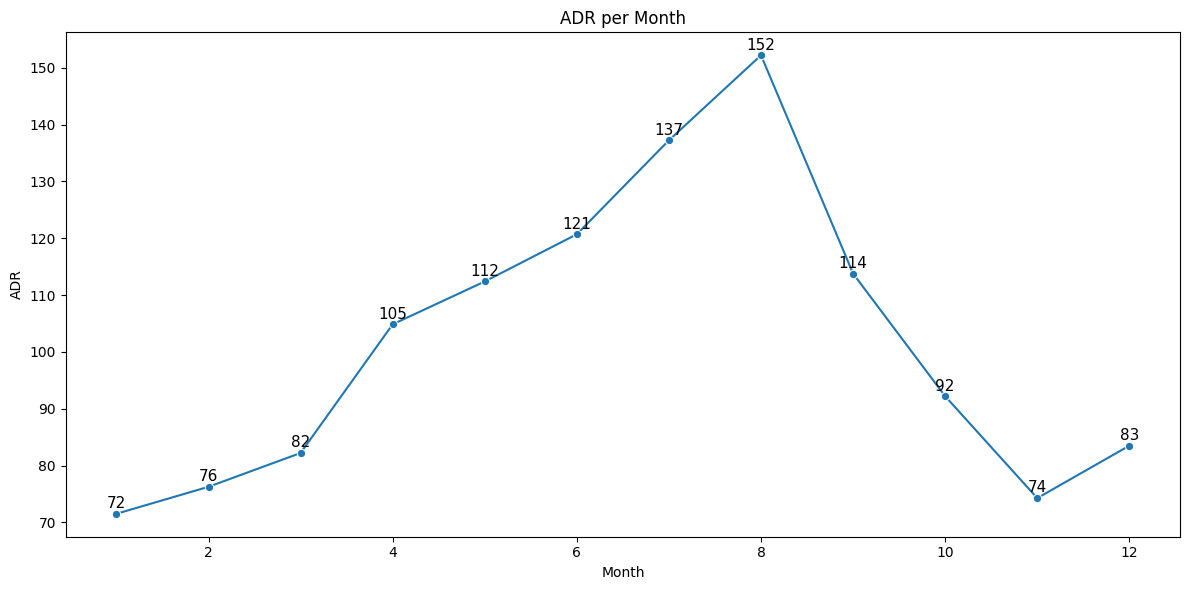

In [27]:
# ADR per Month
plt.figure(figsize=(12, 6))

avg_adr_per_month = data_cleaned.groupby('arrival_month')['adr'].mean().reset_index()
sns.lineplot(data=avg_adr_per_month, x='arrival_month', y='adr', marker='o')

for i in range(len(avg_adr_per_month)):
    x = avg_adr_per_month['arrival_month'][i]
    y = avg_adr_per_month['adr'][i]
    plt.text(x, y + 1, f'{y:.0f}', ha='center', fontsize=11)

plt.title('ADR per Month')
plt.xlabel('Month')
plt.ylabel('ADR')
plt.tight_layout()
plt.show()

- Harga kamar (adr) tertinggi ada di agustus kemungkinan saat musim liburan
- Harga cenderung rendah saat akhir bulan dan awal bulan

In [28]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [29]:
# Calculate average ADR per day of week
avg_adr = data_cleaned.groupby('arrival_day_of_week')['adr'].mean().reset_index()

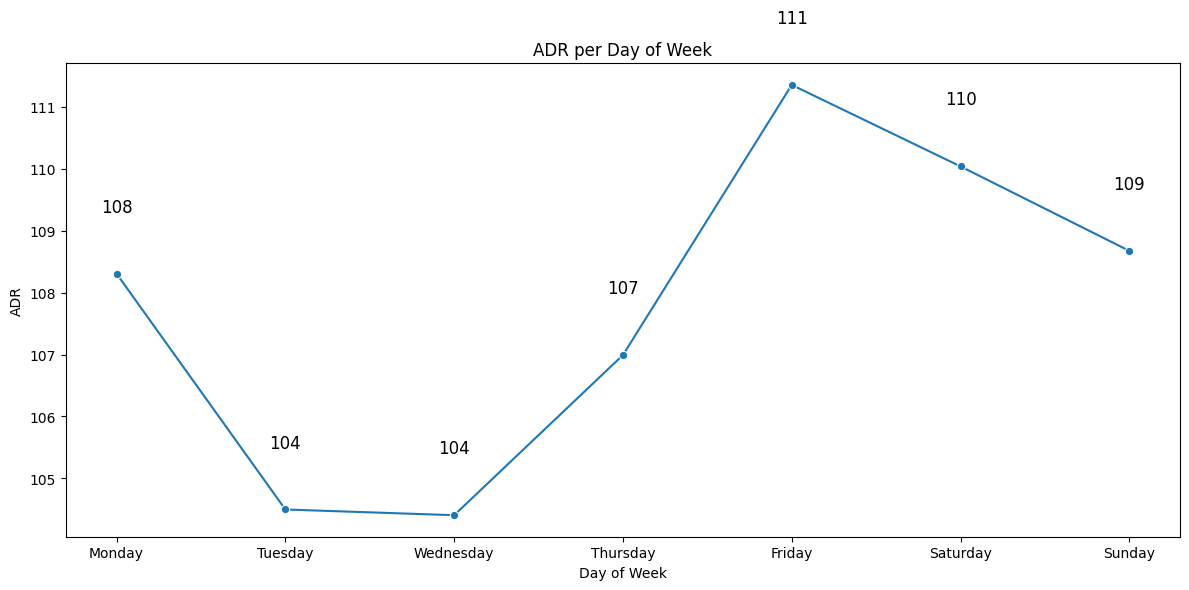

In [30]:
# ADR per day of week
plt.figure(figsize=(12, 6))

avg_adr['arrival_day_of_week'] = pd.Categorical(avg_adr['arrival_day_of_week'], categories=day_order, ordered=True)
avg_adr = avg_adr.sort_values('arrival_day_of_week')
ax = sns.lineplot(data=avg_adr, x='arrival_day_of_week', y='adr', marker='o')

for i in range(len(avg_adr)):
    x = avg_adr['arrival_day_of_week'].iloc[i]
    y = avg_adr['adr'].iloc[i]
    plt.text(x, y + 1, f'{y:.0f}', ha='center', fontsize=12)

plt.title('ADR per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('ADR')
plt.tight_layout()
plt.show()

- Harga cenderung lebih tinggi saat akhir pekan (Friday, Saturday, dan Sunday)
- Hari kerja seperti Tuesday, Wednesday dan Thursday cenderung lebih rendah

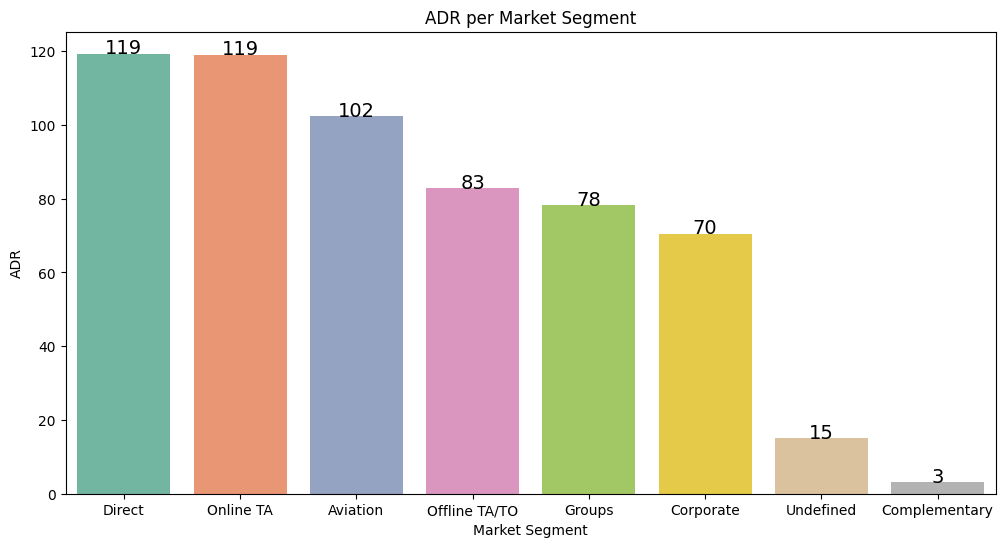

In [31]:
# ADR per market segment
import matplotlib.patches as patches

df_adr_market_segment = data_cleaned.groupby('market_segment')['adr'].mean().reset_index()
df_adr_market_segment = df_adr_market_segment.sort_values(by='adr', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_adr_market_segment, x='market_segment', y='adr', palette='Set2')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height,
            f'{height:.0f}',
            ha='center',
            fontsize=14)

plt.title('ADR per Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('ADR')
plt.show()

- Online TA (Travel Agent) dan Direct memiliki ADR tertinggi.
- Complementary memiliki ADR Terendah kemungkinan karena biasanya diskon 100% dari pihak hotel

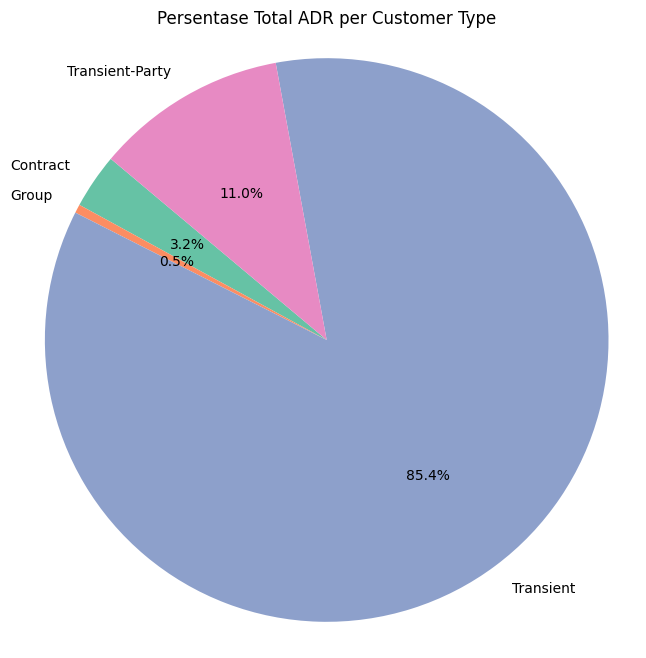

In [ ]:
# ADR per customer type
adr_per_customer = data_cleaned.groupby('customer_type')['adr'].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(adr_per_customer,
        labels=adr_per_customer.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('Set2'))

plt.title('Persentase Total ADR per Customer Type')
plt.axis('equal')
plt.show()

- Mayoritas pendapatan berasal dari tipe pelanggan Transient
- Group adalah yang terendah kemungkinan karena diskon volume

<function matplotlib.pyplot.show(close=None, block=None)>

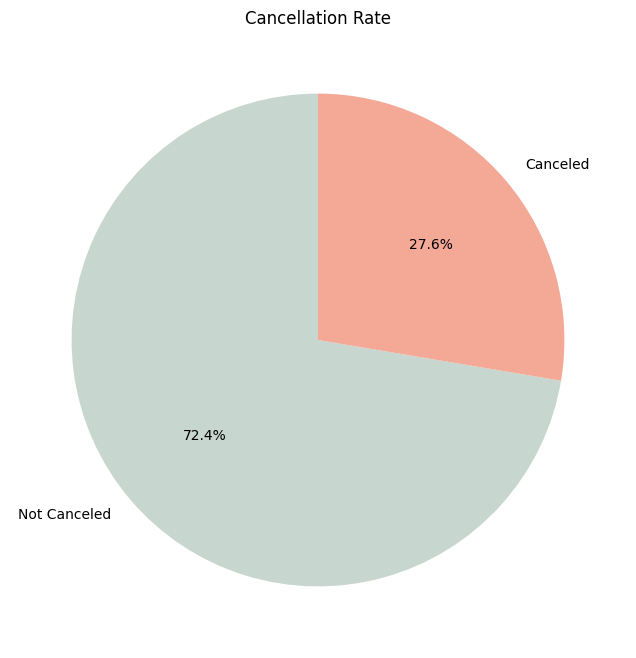

In [ ]:
# pie plot cancellation rate
colors = ['#C7D6CE', '#F4A896']
cancellation_rate = data_cleaned['is_canceled'].value_counts(normalize=True)
labels = ['Not Canceled', 'Canceled']
plt.figure(figsize=(8, 8))
plt.pie(cancellation_rate, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Cancellation Rate')
plt.show

Insight:
- 27,6% reservasi dibatalkan
- 72,4% reservasi tidak dibatalkan

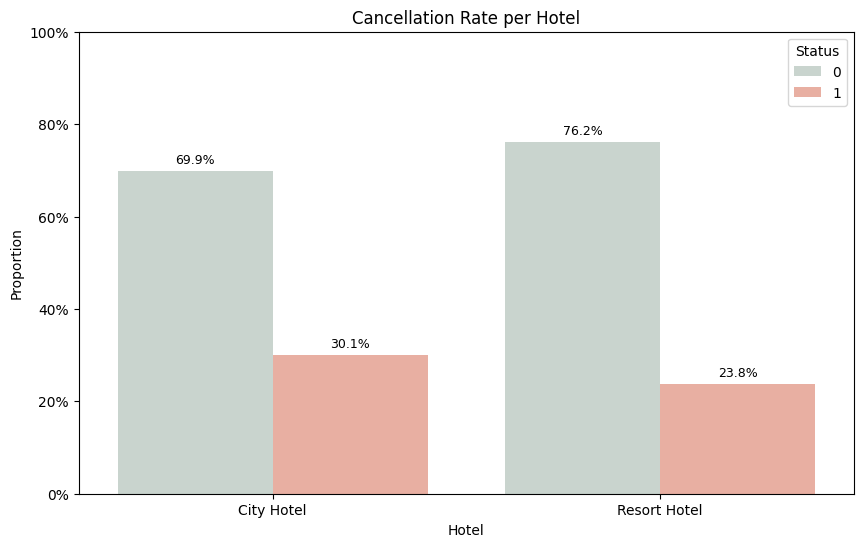

In [ ]:
# cancellation rate per hotel
cancellation_rate = data_cleaned.groupby(['hotel', 'is_canceled']).size().reset_index(name='count')

# total booking per hotel
total_booking = data_cleaned.groupby('hotel').size().reset_index(name='total_booking')

# merge data
cancellation_rate = cancellation_rate.merge(total_booking, on='hotel')
cancellation_rate['rate'] = cancellation_rate['count'] / cancellation_rate['total_booking']

# Barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=cancellation_rate, x='hotel', y='rate', hue='is_canceled', palette=['#C7D6CE', '#F4A896'])

ax.set_ylim(0, 1)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(x=p.get_x() + p.get_width() / 2,
            y=height + 0.01, s=f'{height:.1%}',
            ha='center', va='bottom', fontsize=9
        )

plt.title('Cancellation Rate per Hotel')
plt.xlabel('Hotel')
plt.ylabel('Proportion')
plt.legend(title='Status')
plt.show()

- City Hotel memiliki tingkat pembatalan lebih tinggi(30,1%) dibandingkan dengan Resort Hotel(23,8%)
- Sedangkan, Resort hotel lebih stabil dalam hal kedatangan customer

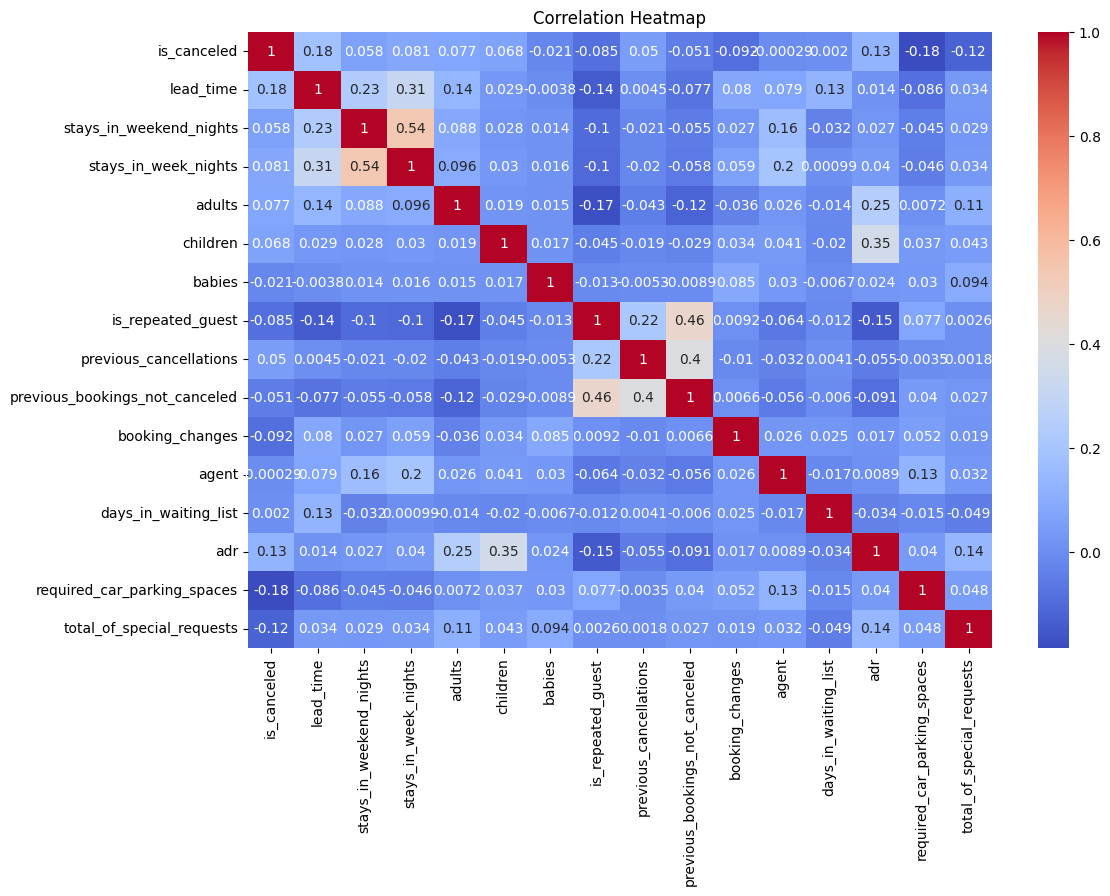

In [ ]:
# heatmap correlation
plt.figure(figsize=(12, 8))
sns.heatmap(data_cleaned[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- `stays_in_weekend_night` vs `stays_in_week_night` -> 0.54
    - Korelasi sedang. Wajar karena dua fitur ini menggambarkan jumlah malam menginap.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

# calculate VIF scores
X_const = add_constant(data_cleaned[numerical_cols])

vif_df = pd.DataFrame([vif(X_const.values, i)
                        for i in range(X_const.shape[1])],
                        index=X_const.columns).reset_index()
vif_df.columns = ['Feature', 'VIF']
vif_df = vif_df.loc[vif_df['Feature'] != 'const']
vif_df

,Feature,VIF
1,is_canceled,1.130126
2,lead_time,1.211841
3,stays_in_weekend_nights,1.435664
4,stays_in_week_nights,1.519897
5,adults,1.126334
6,children,1.154051
7,babies,1.017838
8,is_repeated_guest,1.336723
9,previous_cancellations,1.197879
10,previous_bookings_not_canceled,1.452033


- Hasil VIF semua ada di bawah 2, yang artinya tidak ada multikolinearitas.

# Split Dataset

In [ ]:
df = data_cleaned.copy()

In [ ]:
# split dataset
X = df.drop(columns=['adr', 'arrival_date'])
y = df['adr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((68446, 27), (17112, 27), (68446,), (17112,))

## Categorical Encoding

In [ ]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,68446.0,0.277153,0.447596,0.0,0.0,0.0,1.0,1.0
lead_time,68446.0,80.226719,85.711486,0.0,12.0,50.0,125.0,709.0
stays_in_weekend_nights,68446.0,1.012229,1.023479,0.0,0.0,1.0,2.0,16.0
stays_in_week_nights,68446.0,2.649329,2.024358,0.0,1.0,2.0,4.0,40.0
adults,68446.0,1.88591,0.637243,0.0,2.0,2.0,2.0,55.0
children,68446.0,0.13938,0.45581,0.0,0.0,0.0,0.0,3.0
babies,68446.0,0.01106,0.116605,0.0,0.0,0.0,0.0,10.0
is_repeated_guest,68446.0,0.0367,0.188027,0.0,0.0,0.0,0.0,1.0
previous_cancellations,68446.0,0.030301,0.372657,0.0,0.0,0.0,0.0,26.0
previous_bookings_not_canceled,68446.0,0.177001,1.744413,0.0,0.0,0.0,0.0,72.0


In [ ]:
# log transform
log_cols = ['lead_time', 'previous_cancellations', 'previous_bookings_not_canceled',
            'booking_changes', 'agent', 'days_in_waiting_list']

for col in log_cols:
  X_train[col] = np.log1p(X_train[col])
  X_test[col] = np.log1p(X_test[col])

In [ ]:
# log transform y
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

In [ ]:
# One-Hot Encoding
one_hot_cols = ['hotel', 'meal', 'distribution_channel', 'deposit_type', 'customer_type']

# Ordinal Encoding
ordinal_map = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4,
               'Friday':5, 'Saturday':6, 'Sunday':7}

# Target Encoding
target_encode_cols = ['country', 'market_segment', 'reserved_room_type', 'assigned_room_type']

In [ ]:
# OHE
X_train = pd.get_dummies(X_train, columns=one_hot_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=one_hot_cols, drop_first=True)

In [ ]:
# Ordinal Encoding
X_train['arrival_day_of_week'] = X_train['arrival_day_of_week'].map(ordinal_map)
X_test['arrival_day_of_week'] = X_test['arrival_day_of_week'].map(ordinal_map)

In [ ]:
# Target Encoding
te = TargetEncoder(cols=target_encode_cols)
X_train[target_encode_cols] = te.fit_transform(X_train[target_encode_cols], y_train)
X_test[target_encode_cols] = te.transform(X_test[target_encode_cols])

In [ ]:
X_train.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,arrival_day_of_week,arrival_month,arrival_week,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
16298,0,2.772589,0,3,2,0.0,0,4.384734,4.656168,0,0.0,0.0,4.994734,4.861130,0.0,0.000000,0.0,0,1,4,8,34,True,False,False,False,False,True,False,False,False,False,False,False,True,False
36604,0,1.945910,0,1,1,0.0,0,4.384734,4.703235,0,0.0,0.0,4.438449,4.654158,0.0,5.484797,0.0,1,1,3,5,21,True,False,False,False,False,False,False,True,False,False,False,False,True,False
12823,1,5.429346,0,3,2,0.0,0,4.749538,4.703235,0,0.0,0.0,4.438449,4.482764,0.0,5.484797,0.0,0,3,2,7,29,True,False,False,False,False,False,False,True,False,False,False,False,True,False
63262,1,4.330733,0,1,2,0.0,0,4.384734,4.703235,0,0.0,0.0,4.438449,4.482764,0.0,2.302585,0.0,0,0,6,2,5,False,False,False,True,False,False,False,True,False,False,False,False,True,False
103693,0,4.174387,1,3,2,0.0,0,4.663647,4.703235,0,0.0,0.0,4.722259,4.580668,0.0,2.302585,0.0,0,2,1,12,52,False,False,False,False,False,False,False,True,False,False,False,False,True,False


In [ ]:
X_train_cols = X_train.columns.tolist()

In [ ]:
X_train.columns

Index(['is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'country',
       'market_segment', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'required_car_parking_spaces',
       'total_of_special_requests', 'arrival_day_of_week', 'arrival_month',
       'arrival_week', 'hotel_Resort Hotel', 'meal_FB', 'meal_HB', 'meal_SC',
       'meal_Undefined', 'distribution_channel_Direct',
       'distribution_channel_GDS', 'distribution_channel_TA/TO',
       'distribution_channel_Undefined', 'deposit_type_Non Refund',
       'deposit_type_Refundable', 'customer_type_Group',
       'customer_type_Transient', 'customer_type_Transient-Party'],
      dtype='object')

In [ ]:
import joblib

joblib.dump(X_train_cols, 'model_columns.joblib')

['model_columns.joblib']

In [ ]:
joblib.dump(te, 'target_encoder.joblib')

['target_encoder.joblib']

## Scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training

## Ridge Regression

In [ ]:
ridge = Ridge(random_state=42)

# parameter for alpha
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# GridSearchCV
ridge_grid = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

## Lasso Regression

In [ ]:
lasso = Lasso(random_state=42)

# parameter for alpha
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# GridSearchCV
lasso_grid = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

## Linear Regression

In [ ]:
lr = LinearRegression()

# fit the model (training)
lr.fit(X_train, y_train)

LinearRegression()

## Random Forest Regressor

In [ ]:
rf = RandomForestRegressor(random_state=42)

# parameter for n_estimators
param_grid = {
    'n_estimators': [10, 30, 50],
    'max_depth': [5, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

# GridSearchCV
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [10, 30, 50]},
             scoring='neg_mean_squared_error')

## XGB Regressor

In [ ]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.05, 0,1],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8]
}

# GridSearchCV
xgb_grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8],
                         'learning_rate': [0.01, 0.05, 0, 1],
                         'max_depth': [3, 5], 'n_estimators': [100, 200],
                         'subsample': [0.6, 0.8]},
             scoring='neg_mean_squared_error')

# Model Evaluation

## Training Error (Ridge)

In [ ]:
# predict
y_pred_train_ridge = ridge_grid.predict(X_train)


print("RMSE for training data is {}".format(np.sqrt(mean_squared_error(y_train, y_pred_train_ridge))))
print("MAE for training data is {}".format(mean_absolute_error(y_train, y_pred_train_ridge)))
print("R2 for training data is {}".format(r2_score(y_train, y_pred_train_ridge)))

RMSE for training data is 0.38615175628205095
MAE for training data is 0.272067966818368
R2 for training data is 0.6167263478019174


## Testing Error (Ridge)

In [ ]:
# prepare prediction result on test data
y_pred_test_ridge = ridge_grid.predict(X_test)

# ground truth target
y_test_ridge = y_test.to_numpy()
y_test_ridge = y_test_ridge.reshape(len(y_test_ridge),)

In [ ]:
print("RMSE for training data is {}".format(np.sqrt(mean_squared_error(y_test_ridge, y_pred_test_ridge))))
print("MAE for training data is {}".format(mean_absolute_error(y_test_ridge, y_pred_test_ridge)))
print("R2 for training data is {}".format(r2_score(y_test_ridge, y_pred_test_ridge)))

RMSE for training data is 0.3926536357828171
MAE for training data is 0.27317250234613183
R2 for training data is 0.6300640186951978


## Training Error (Lasso)

In [ ]:
# predict
y_pred_train_lasso = lasso_grid.predict(X_train)

print("RMSE for training data is {}".format(np.sqrt(mean_squared_error(y_train, y_pred_train_lasso))))
print("MAE for training data is {}".format(mean_absolute_error(y_train, y_pred_train_lasso)))
print("R2 for training data is {}".format(r2_score(y_train, y_pred_train_lasso)))

RMSE for training data is 0.39109162016555626
MAE for training data is 0.2783216191791591
R2 for training data is 0.6068575341557325


## Testing Error (Lasso)

In [ ]:
# prepare prediction result on test data
y_pred_test_lasso = lasso_grid.predict(X_test)

# ground truth target
y_test_lasso = y_test.to_numpy()
y_test_lasso = y_test_lasso.reshape(len(y_test_lasso),)

In [ ]:
# predict
print("RMSE for training data is {}".format(np.sqrt(mean_squared_error(y_test_lasso, y_pred_test_lasso))))
print("MAE for training data is {}".format(mean_absolute_error(y_test_lasso, y_pred_test_lasso)))
print("R2 for training data is {}".format(r2_score(y_test_lasso, y_pred_test_lasso)))

RMSE for training data is 0.39887998170586686
MAE for training data is 0.28025360922228965
R2 for training data is 0.6182387793890176


## Training Error ( Linear Regression)

In [ ]:
# predict
y_pred_train_lr = lr.predict(X_train)

print("RMSE for training data is {}".format(np.sqrt(mean_squared_error(y_train, y_pred_train_lr))))
print("MAE for training data is {}".format(mean_absolute_error(y_train, y_pred_train_lr)))
print("R2 for training data is {}".format(r2_score(y_train, y_pred_train_lr)))

RMSE for training data is 0.3861517347339761
MAE for training data is 0.2720636650119052
R2 for training data is 0.6167263905768572


## Testing Error (Linear Regression)

In [ ]:
# prepare prediction result on test data
y_pred_test_lr = lr.predict(X_test)

# ground truth target
y_test_lr = y_test.to_numpy()
y_test_lr = y_test_lr.reshape(len(y_test_lr),)

In [ ]:
# predict
print("RMSE for training data is {}".format(np.sqrt(mean_squared_error(y_test_lr, y_pred_test_lr))))
print("MAE for training data is {}".format(mean_absolute_error(y_test_lr, y_pred_test_lr)))
print("R2 for training data is {}".format(r2_score(y_test_lr, y_pred_test_lr)))

RMSE for training data is 0.3926492949798621
MAE for training data is 0.2731653096487709
R2 for training data is 0.6300721979665873


## Training Error (Random Forest Regressor)

In [ ]:
# predict
y_pred_train_rf = rf_grid.predict(X_train)

print("RMSE for training data is {}".format(np.sqrt(mean_squared_error(y_train, y_pred_train_rf))))
print("MAE for training data is {}".format(mean_absolute_error(y_train, y_pred_train_rf)))
print("R2 for training data is {}".format(r2_score(y_train, y_pred_train_rf)))

RMSE for training data is 0.2559729148087485
MAE for training data is 0.1646709924704259
R2 for training data is 0.8315849246342172


## Testing Error (Random Forest Regressor)

In [ ]:
# prepare prediction result on test data
y_pred_test_rf = rf_grid.predict(X_test)

# ground truth target
y_test_rf = y_test.to_numpy()
y_test_rf = y_test_rf.reshape(len(y_test_rf),)

In [ ]:
# predict
print("RMSE for training data is {}".format(np.sqrt(mean_squared_error(y_test_rf, y_pred_test_rf))))
print("MAE for training data is {}".format(mean_absolute_error(y_test_rf, y_pred_test_rf)))
print("R2 for training data is {}".format(r2_score(y_test_rf, y_pred_test_rf)))

RMSE for training data is 0.2825032081841622
MAE for training data is 0.17304847253986183
R2 for training data is 0.8085064738087988


## Training Error (XGB Regressor)

In [ ]:
# predict
y_pred_train_xgb = xgb_grid.predict(X_train)

print("RMSE for training data is {}".format(np.sqrt(mean_squared_error(y_train, y_pred_train_xgb))))
print("MAE for training data is {}".format(mean_absolute_error(y_train, y_pred_train_xgb)))
print("R2 for training data is {}".format(r2_score(y_train, y_pred_train_xgb)))

RMSE for training data is 0.23029537789184246
MAE for training data is 0.14709204909223858
R2 for training data is 0.863678806574629


## Testing Error (XGB Regressor)

In [ ]:
# prepare prediction result on test data
y_pred_test_xgb = xgb_grid.predict(X_test)

# ground truth target
y_test_xgb = y_test.to_numpy()
y_test_xgb = y_test_xgb.reshape(len(y_test_xgb),)

In [ ]:
# predict
print("RMSE for training data is {}".format(np.sqrt(mean_squared_error(y_test_xgb, y_pred_test_xgb))))
print("MAE for training data is {}".format(mean_absolute_error(y_test_xgb, y_pred_test_xgb)))
print("R2 for training data is {}".format(r2_score(y_test_xgb, y_pred_test_xgb)))

RMSE for training data is 0.2533537412736589
MAE for training data is 0.15254271832120528
R2 for training data is 0.8459853717620446


In [ ]:
# inverse transform
y_pred = y_pred_test_xgb
y_pred_orig = np.expm1(y_pred)
y_true_orig = np.expm1(y_test)

print("RMSE:", np.sqrt(mean_squared_error(y_true_orig, y_pred_orig)))
print("MAE:", mean_absolute_error(y_true_orig, y_pred_orig))
print("R2:", r2_score(y_true_orig, y_pred_orig))

RMSE: 22.676581868775273
MAE: 15.505321800564356
R2: 0.803990973760858


Perbandingan Model (Data Test)

| Model | RMSE | MAE | R2 Score |
|-|-|-|-|
Ridge Regression | 0.3926 | 0.2731 | 0.6300
Lasso Regression | 0.3988 | 0.2802 | 0.6182
Linear Regression | 0.3926 | 0.2731 | 0.6300
Random Forest | 0.2825 | 0.1730 | 0.8085
XGBoost Regressor | 0.2533 | 0.1525 | 0.8459 ✅

Insight:
- XGBoost Regressor memberikan performa terbaik dengan:
  - RMSE dan MAE paling rendah
  - R2 Score paling tinggi -> menjelaskan ~84,5% variansi target

## Model Interpretation

In [ ]:
# Define original_feature_names
original_feature_names = X_train_cols

In [ ]:
# initiate explainer for XGBoost model
import dalex as dx

X_train_df = pd.DataFrame(X_train, columns=original_feature_names)
xgb_exp = dx.Explainer(xgb_grid.best_estimator_, X_train_df, y_train, label="XGBoost")

Preparation of a new explainer is initiated

  -> data              : 68446 rows 36 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 68446 values
  -> model_class       : xgboost.sklearn.XGBRegressor (default)
  -> label             : XGBoost
  -> predict function  : <function yhat_default at 0x7b92742f1d00> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -0.507, mean = 4.56, max = 5.92
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -4.07, mean = -4.67e-05, max = 4.53
  -> model_info        : package xgboost

A new explainer has been created!


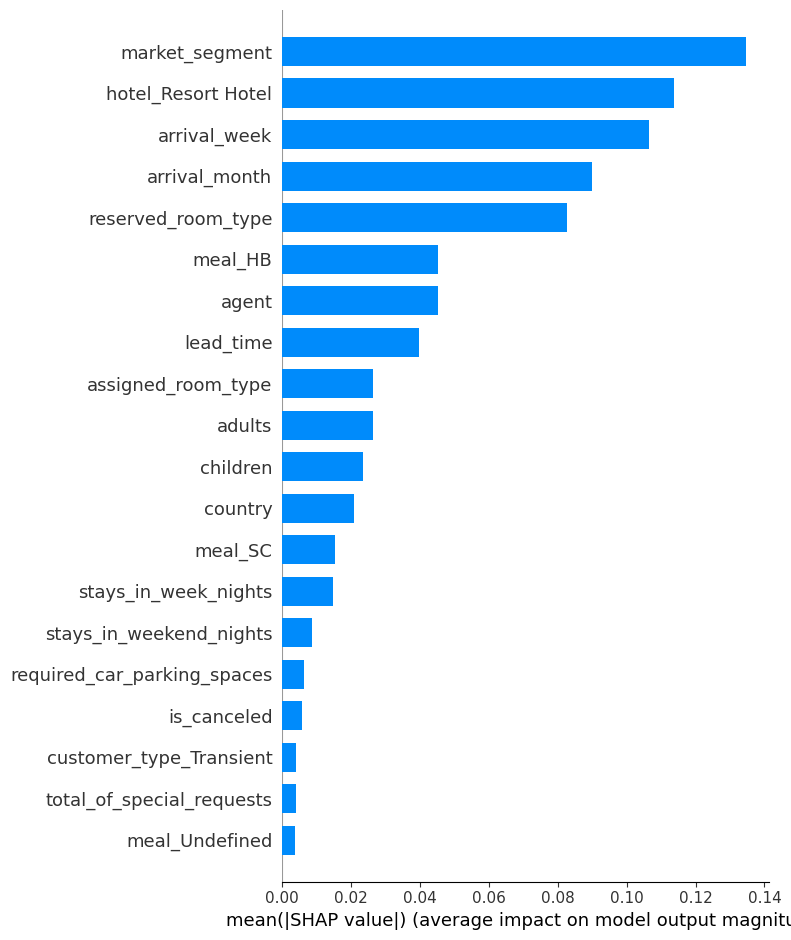

In [ ]:
# create SHAP
import shap

xgb_shap = shap.TreeExplainer(xgb_grid.best_estimator_).shap_values(X_train_df)
shap.summary_plot(xgb_shap, X_train_df, plot_type="bar")

In [ ]:
import joblib

joblib.dump(xgb_grid.best_estimator_, 'xgboost_model.joblib')

['xgboost_model.joblib']